<a href="https://colab.research.google.com/github/Jhernandezh2/MetodosI_JulianaHernandez_MariaCamilaRamirez/blob/main/Tarea%205/Tarea_5_m%C3%ADnimos_cuadrados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 5. Mínimos Cuadrados.

**Capítulo 9. Estimación de Parámetros: Mínimos cuadrados**

**Punto 1**


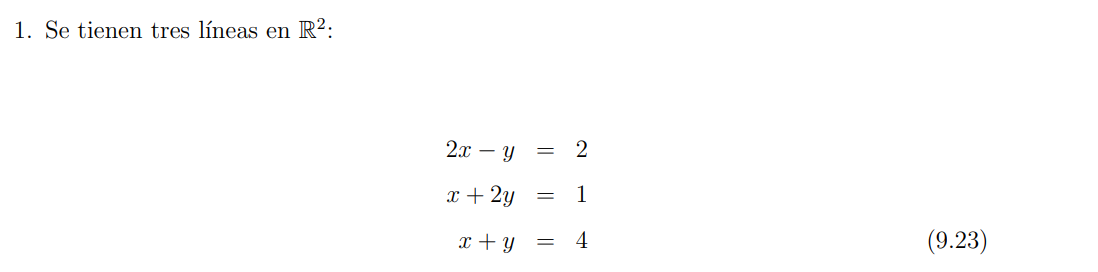

a) Con el método de mínimos cuadrados encuentre el punto común a las tres líneas. Grafique las tres líneas y el punto solución, ¿qué interpretación puede dar?

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def LeastSquaresSolve(A, b):

    # A^T * A
    ATA = np.dot(A.T, A)

    # A^T * b
    ATb = np.dot(A.T, b)

    # Inversa (A^T * A)
    ATA_inv = np.linalg.inv(ATA)

    # (A^T * A)^-1 * (A^T * b)
    xsol = np.dot(ATA_inv, ATb)

    return xsol


A = np.array([[2, -1],
              [1, 2],
              [1, 1]])

b = np.array([2,1,4])

xsol = LeastSquaresSolve(A, b)
print(xsol)


def line1(x):
    return 2*x-2

def line2(x):
    return (1-x) / 2

def line3(x):
    return 4-x

[1.42857143 0.42857143]


b) Realice una búsqueda iterativa entre −5 ≤ x ≤ 5 y −5 ≤ y ≤ 5 con un paso de
h = 0.01 para encontrar la menor distancia del problema. Grafique la distancia y
compare con el resultado obtenido con mínimos cuadrados.

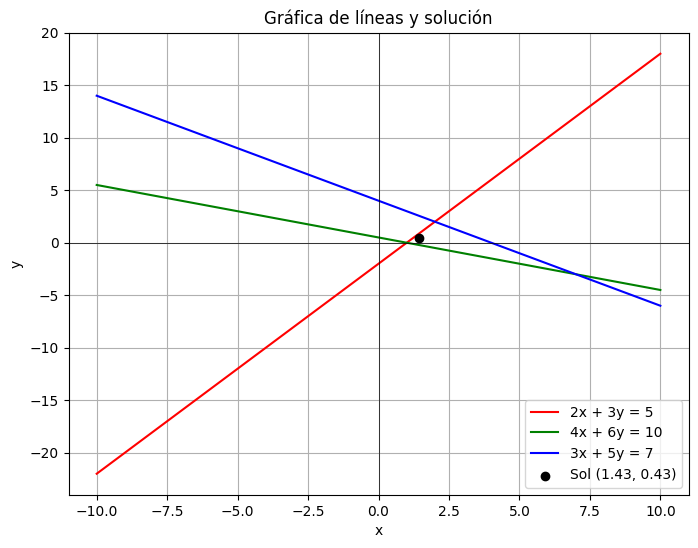

In [13]:
x_vals = np.linspace(-10, 10, 100)
y_vals1 = line1(x_vals)
y_vals2 = line2(x_vals)
y_vals3 = line3(x_vals)

plt.figure(figsize=(8, 6))


plt.plot(x_vals, y_vals1, label='2x + 3y = 5', color='r')
plt.plot(x_vals, y_vals2, label='4x + 6y = 10', color='g')
plt.plot(x_vals, y_vals3, label='3x + 5y = 7', color='b')


plt.scatter(xsol[0], xsol[1], color='black', zorder=5, label=f'Sol ({xsol[0]:.2f}, {xsol[1]:.2f})')

plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.title('Gráfica de líneas y solución')
plt.legend()

plt.grid(True)
plt.show()

El método no encuentra una solución exacta para cada ecuación, sino más bien un punto de compromiso que equilibra el error entre las tres.

Cuanto más pequeña sea el área del triángulo (o cuanto más cerca estén las líneas de intersectarse), menor será el error general y más precisa será la solución de mínimos cuadrados.

Si las líneas están muy lejos de cruzarse, el punto de solución estará más central entre ellas, lo que reflejará un mayor error en la aproximación.

Distancia Mínima en: 2.5354683985409867 at point (1.429999999999863, 0.42999999999988425)


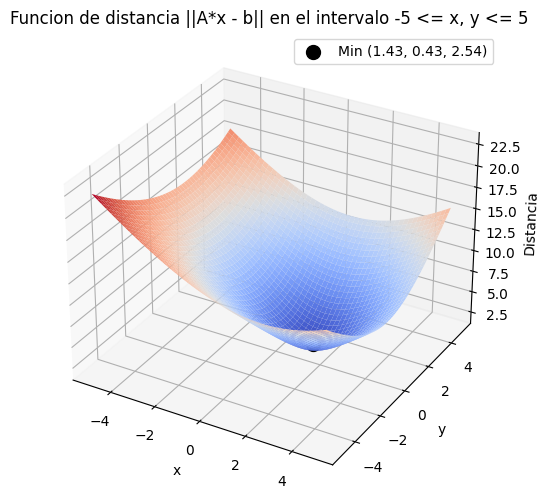

In [9]:
import numpy as np
import matplotlib.pyplot as plt


A = np.array([[2, -1],
              [1, 2],
              [1, 1]])

b = np.array([2, 1, 4])

# D = ||A*x - b||
def distance(x, y):
    point = np.array([x, y])
    return np.linalg.norm(np.dot(A, point) - b)


x_vals = np.arange(-5, 5, 0.01)
y_vals = np.arange(-5, 5, 0.01)

X, Y = np.meshgrid(x_vals, y_vals)
Z = np.zeros_like(X)


for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = distance(X[i, j], Y[i, j])


min_index = np.unravel_index(np.argmin(Z), Z.shape)
min_x, min_y = X[min_index], Y[min_index]
min_distance = Z[min_index]

print(f'Distancia Mínima en: {min_distance} at point ({min_x}, {min_y})')


fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, cmap='coolwarm', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Distancia')

# Punto con mínima distancia
ax.scatter(min_x, min_y, min_distance, color='black', s=100, label=f'Min ({min_x:.2f}, {min_y:.2f}, {min_distance:.2f})')

plt.title('Funcion de distancia ||A*x - b|| en el intervalo -5 <= x, y <= 5')
plt.legend()
plt.show()


**Punto 6.**

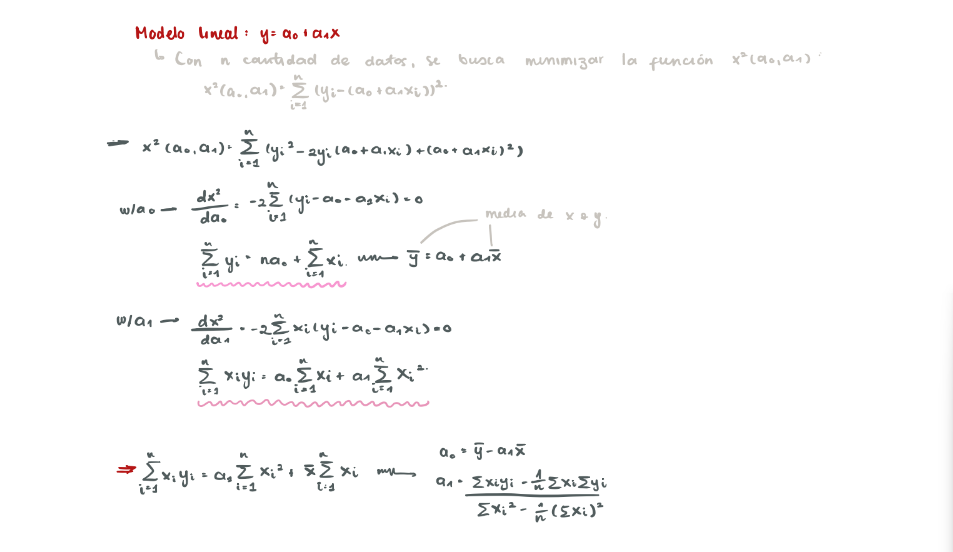

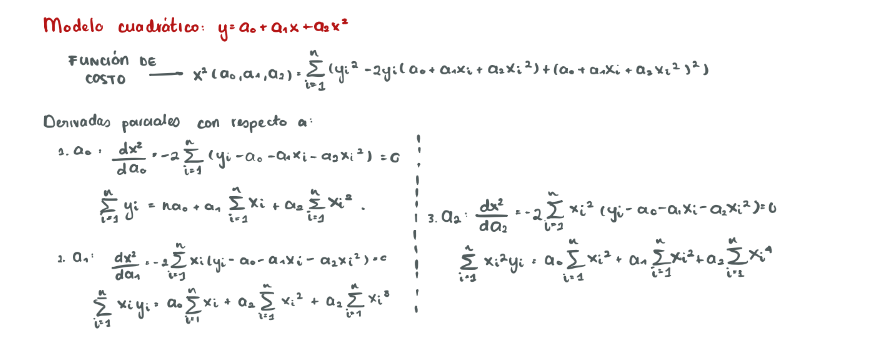

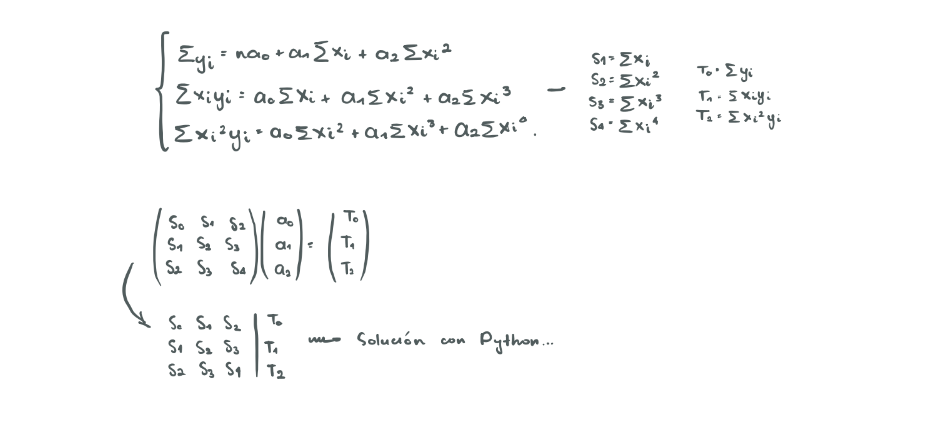

In [10]:
import numpy as np


x = np.array([1, 2, 3, 4, 5])  # Valores ejemplo
y = np.array([2.1, 4.2, 6.1, 8.4, 10.5])

n = len(x)

S0 = n
S1 = np.sum(x)
S2 = np.sum(x**2)
S3 = np.sum(x**3)
S4 = np.sum(x**4)

T0 = np.sum(y)
T1 = np.sum(x * y)
T2 = np.sum(x**2 * y)


A = np.array([
    [S0, S1, S2],
    [S1, S2, S3],
    [S2, S3, S4]
])

B = np.array([T0, T1, T2])


coeff = np.linalg.solve(A, B)


a_0, a_1, a_2 = coeff

print(f"a_0: {a_0}, a_1: {a_1}, a_2: {a_2}")


a_0: 0.15999999999995163, a_1: 1.9285714285714706, a_2: 0.028571428571421642


**Punto 7. **

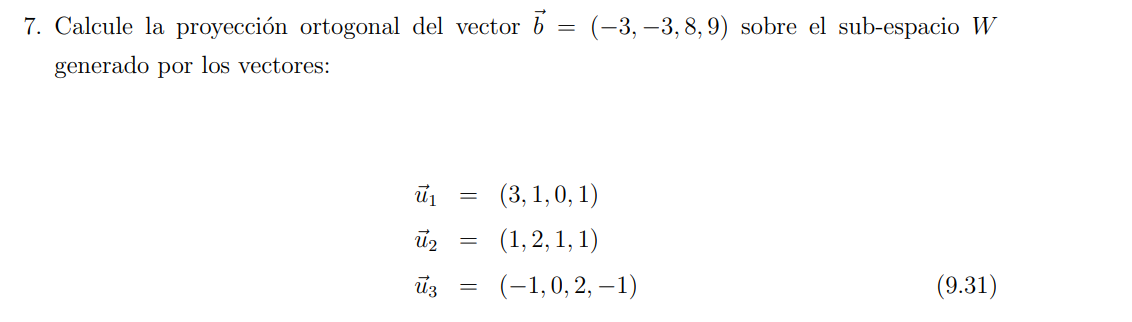

a) Usando mínimos cuadrados matriciales. La proyección ortogonal es pW (b) = Ax, donde
las columnas de A son los vectores base y x es la solución de mínimos cuadrados.

In [11]:
import numpy as np


b = np.array([-3, -3, 8, 9])
A = np.array([[3, 1, -1],
              [1, 2, 0],
              [0, 1, 2],
              [1, 1, -1]])

# A^T * A
AtA = np.dot(A.T, A)

# A^T * b
Atb = np.dot(A.T, b)


det_AtA = np.linalg.det(AtA)

if det_AtA != 0:

    inv_AtA = np.linalg.inv(AtA)
    x = np.dot(inv_AtA, Atb)
else:
    raise ValueError("Matriz no invertible")

projection = np.dot(A, x)

print("(x):", x)
print("Proyección:", projection)



(x): [-1.  2.  1.]
Proyección: [-2.00000000e+00  3.00000000e+00  4.00000000e+00 -3.33066907e-16]


b) Con el proceso de Grand-Schmidt obtener una base ortonormal (v1, v2, v3) y luego
calcular la proyección sobre dicha base: pW (b) = c1v1 +c2v2 +c3v3, donde ci =< b.vi >
para i = 1, 2, 3. Respuesta: pW (b) = (−2, 3, 4, 0)

In [12]:
import numpy as np


u1 = np.array([3, 1, 0, 1])
u2 = np.array([1, 2, 1, 1])
u3 = np.array([-1, 0, 2, -1])


b = np.array([-3, -3, 8, 9])

# Gram-Schmidt
def gram_schmidt(vectors):
    ortonormal_base = []
    for v in vectors:

        for u in ortonormal_base:
            v = v - np.dot(v, u) * u

        v = v / np.sqrt(np.dot(v, v))
        ortonormal_base.append(v)
    return np.array(ortonormal_base)


base = gram_schmidt([u1, u2, u3])


proj = np.zeros(b.shape)
for v in base:
    coefficient = np.dot(b, v)
    proj += coefficient * v

print("Base ortonormal (v1, v2, v3):")
print(base)
print("Proyeccion con Gram-Schmidt:", proj)


Base ortonormal (v1, v2, v3):
[[ 0.90453403  0.30151134  0.          0.30151134]
 [-0.32961713  0.75341057  0.51796977  0.2354408 ]
 [ 0.25633581 -0.26982716  0.78249877 -0.49918025]]
Proyeccion con Gram-Schmidt: [-2.00000000e+00  3.00000000e+00  4.00000000e+00  3.33066907e-16]
